In [ ]:
from AlgorithmImports import *

class BollingerBandsReversionStrategy(QCAlgorithm):
    def Initialize(self):
        self.SetStartDate(2023, 1, 1)
        self.SetEndDate(2024, 1, 1)
        self.SetCash(100000)
        self.symbol = self.AddEquity("AAPL", Resolution.Daily).Symbol
        self.bb = self.BB(self.symbol, 20, 2, MovingAverageType.Simple, Resolution.Daily)        
        self.invested = False

    def OnData(self, data):

        if not self.bb.IsReady:
            return
        price = self.Securities[self.symbol].Price
        lower_band = self.bb.LowerBand.Current.Value
        upper_band = self.bb.UpperBand.Current.Value
        middle_band = self.bb.MiddleBand.Current.Value
        
        if price < lower_band and not self.invested:
            self.SetHoldings(self.symbol, 1)  
            self.invested = True
            self.Debug(f"Bought {self.symbol} at {price}, Lower Band: {lower_band}")
        
        elif price > upper_band and self.invested:
            self.Liquidate(self.symbol)
            self.invested = False
            self.Debug(f"Sold {self.symbol} at {price}, Upper Band: {upper_band}")


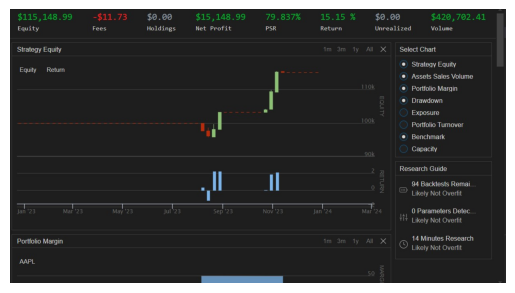

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "C:/Users/meets/QUANT/CODE/QUANTCONNECT/BB_2-20.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()